In [2]:
import matplotlib.pyplot as plt
import sys
from pathlib import Path
notebook_dir = Path().resolve()  
sys.path.append(str(notebook_dir / "analysis"))

from visualize.utils_contactmap import plot_contactmap, plot_diffmap, plot_contactmap_w_arcbands

Plotting Contactmaps

Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/GENCODE/GRCm39/transcripts.fai
Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/GENCODE/GRCm39/transcripts.fai


(<Figure size 2400x1800 with 2 Axes>, array([[<AxesSubplot:>]], dtype=object))

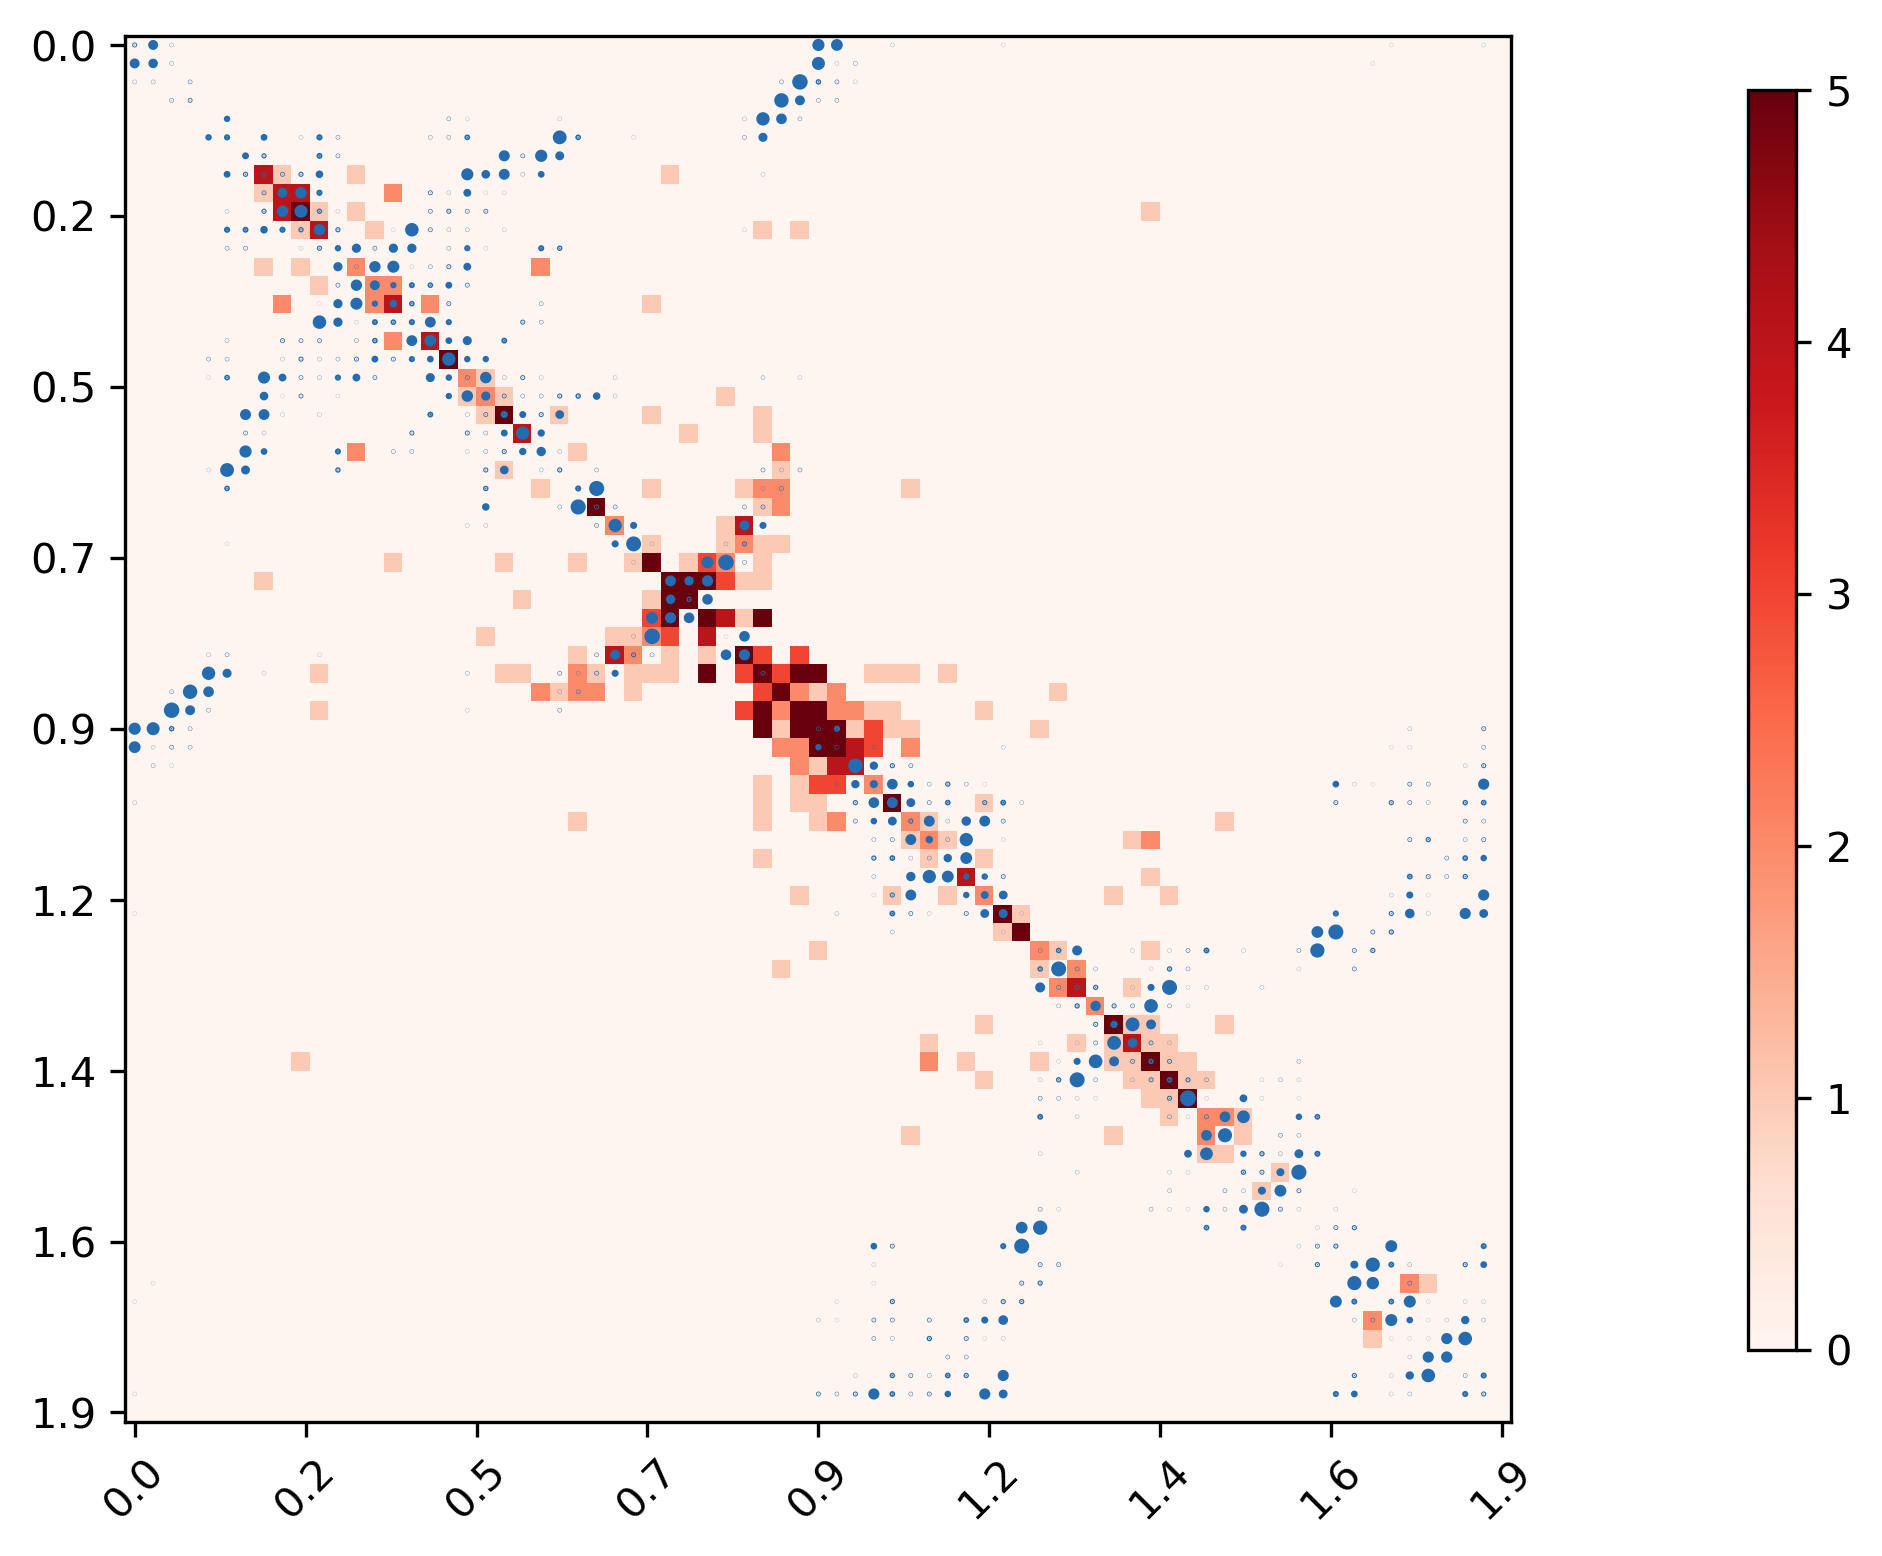

In [3]:
SRR13628276 = ["/ChIP_seq_2/StemCells/RNAInteraction20250327/output/chimeric/inner/mouse_transcript/SRR13628276/SRR13628276.dedup.pairs.gz",
               "/ChIP_seq_2/StemCells/RNAInteraction20250327/output/chimeric/inner/mouse_transcript/SRR13628277/SRR13628277.dedup.pairs.gz"]
fig = plt.figure(figsize=(8,6),dpi=300)
ax:plt.Axes = plt.subplot()

# KARR-seq (Left)
plot_contactmap(SRR13628276, p_chrom1="ENSMUST00000052248.8",p_resolution=25, p_max=5, p_figsize=(6, 6),
                p_structure=True, p_display="full", p_balance=False,p_genome="GRCm39T",
                p_dot_size=0.5, p_ax=(fig, ax), p_verbose=False)


Clustering chimeric reads and classifying them into loops, left stripes and right stripes

In [4]:
from clustering.cluster_pairs import cluster_chimeric_pairs
data_txt = "/ChIP_seq_2/StemCells/RNAInteraction20250327/output/chimeric/pairs/mouse_transcript/SRR13628276/SRR13628276.txt.gz"

dict_kwargs = {
    "p_iid": "ENSMUST00000052248.8", "p_genome": "GRCm39T", 
    "p_long": 200, "p_span": 10, "p_overlap": 10, "p_min_reads": 3, 
    "p_min_interactions": 200, "p_max_interactions": 20000, 
    "f_sizes": None, "f_tsne": None, "f_pairs": data_txt, "f_output": "a.txt", "f_bed": "b.txt"
}
results = cluster_chimeric_pairs(**dict_kwargs)
print(results)

[[['ENSMUST00000052248.8', 632, 696, 'ENSMUST00000052248.8', 807, 858, 'noise_or_unstable', 5.329774565194827, 5.076543482210925, 3.4250473126179077, 3.6974803996941557], ['ENSMUST00000052248.8', 557, 623, 'ENSMUST00000052248.8', 875, 920, 'noise_or_unstable', 4.313163866181053, 2.8641783973007713, 6.042486096815898, 3.341738163651416], ['ENSMUST00000052248.8', 271, 374, 'ENSMUST00000052248.8', 400, 504, 'noise_or_unstable', 3.8227938549481957, 4.584606470449799, 5.503033382428248, 6.04812282168686], ['ENSMUST00000052248.8', 1020, 1083, 'ENSMUST00000052248.8', 1355, 1448, 'loops', 0.0, 0.0, 0.0, 0.0], ['ENSMUST00000052248.8', 427, 504, 'ENSMUST00000052248.8', 584, 628, 'loops', 0.0, 0.0, 0.0, 0.0], ['ENSMUST00000052248.8', 860, 927, 'ENSMUST00000052248.8', 974, 1090, 'noise_or_unstable', 5.9921249823717755, 5.091654521021127, 1.7325742236653796, 3.6547949755548954], ['ENSMUST00000052248.8', 343, 499, 'ENSMUST00000052248.8', 513, 574, 'loops', 0.0, 0.0, 0.0, 0.0], ['ENSMUST00000052248.8

Plotting Contactmaps with ArcBands

Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/GENCODE/GRCm39/transcripts.fai
Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/GENCODE/GRCm39/transcripts.fai


(<Figure size 1000x1000 with 3 Axes>, array([[<AxesSubplot:>]], dtype=object))

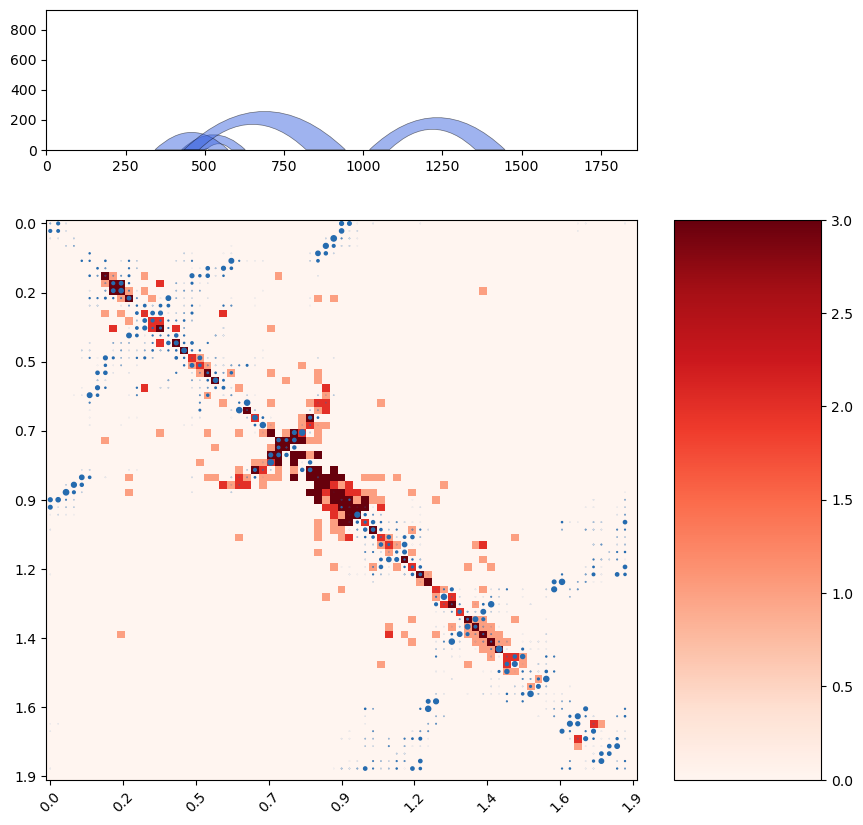

In [5]:
data_mouse = ["/ChIP_seq_2/StemCells/RNAInteraction20250327/output/chimeric/inner/mouse_transcript/SRR13628276/SRR13628276.dedup.pairs.gz", 
              "/ChIP_seq_2/StemCells/RNAInteraction20250327/output/chimeric/inner/mouse_transcript/SRR13628277/SRR13628277.dedup.pairs.gz"]

f_cluster_mouse = "a.txt"

plot_contactmap_w_arcbands(data_mouse, f_cluster_mouse, p_chrom1="ENSMUST00000052248.8", p_resolution=25, p_max=3, p_figsize=(10, 10),
                           p_structure=True, p_genome="GRCm39T", p_display="full", p_balance=False,
                           p_dot_size=1.0, p_multi=False, p_verbose=False)

Differential Maps

Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/GENCODE/GRCm39/transcripts.fai
Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/GENCODE/GRCm39/transcripts.fai
Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/GENCODE/GRCm39/transcripts.fai
Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/GENCODE/GRCm39/transcripts.fai


(<Figure size 1800x800 with 4 Axes>, array([[<AxesSubplot:>]], dtype=object))

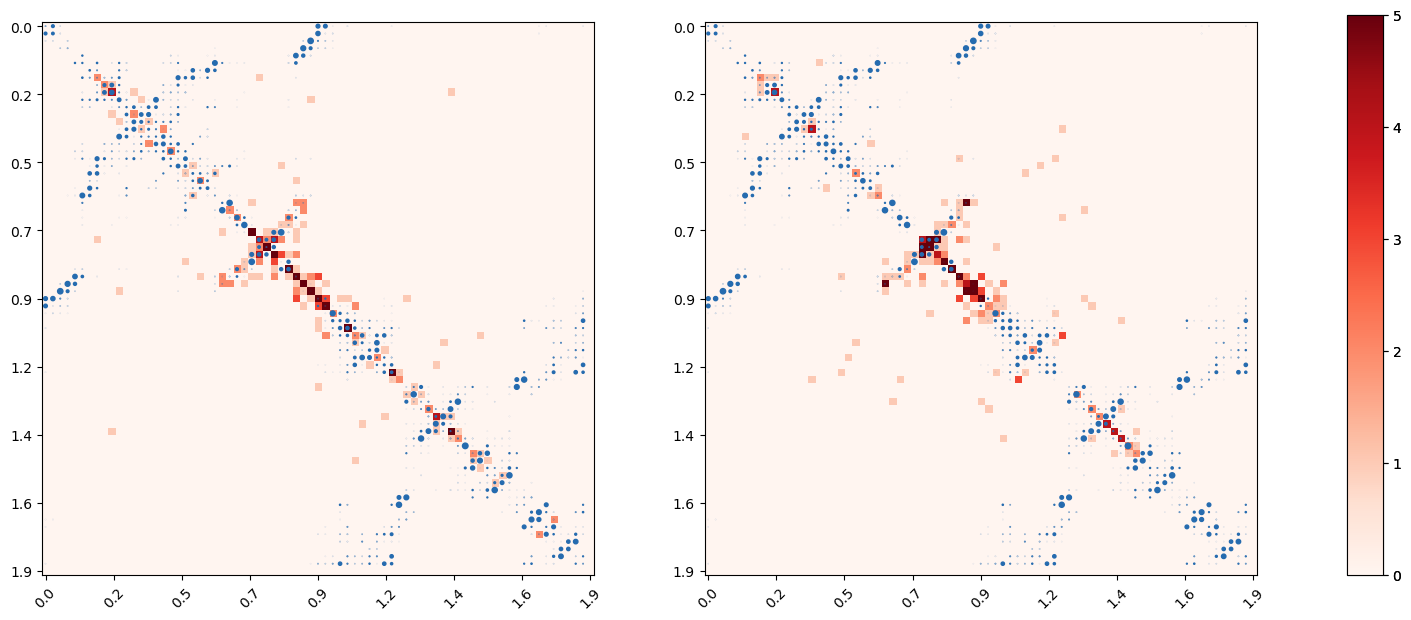

In [8]:
SRR13628276 = ["/ChIP_seq_2/StemCells/RNAInteraction20250327/output/chimeric/inner/mouse_transcript/SRR13628276/SRR13628276.dedup.pairs.gz"]
SRR13628279 = ["/ChIP_seq_2/StemCells/RNAInteraction20250327/output/chimeric/inner/mouse_transcript/SRR13628279/SRR13628279.dedup.pairs.gz"]
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
plot_contactmap(SRR13628276, p_chrom1="ENSMUST00000052248.8", p_resolution=25, p_max=5, p_figsize=(6, 6),
             p_structure=True, p_genome="GRCm39T", p_display="full", p_balance=False,
             p_dot_size=1.0, p_ax=(fig, ax[0]), p_verbose=False)

plot_contactmap(SRR13628279, p_chrom1="ENSMUST00000052248.8", p_resolution=25, p_max=5, p_figsize=(6, 6),
             p_structure=True, p_genome="GRCm39T", p_display="full", p_balance=False,
             p_dot_size=1.0, p_ax=(fig, ax[1]), p_verbose=False)

Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/GENCODE/GRCm39/transcripts.fai
Debug: After get_ref(), f_size = /ChIP_seq_2/Data/index/Mus_musculus/GENCODE/GRCm39/transcripts.fai
['ENSMUST00000052248.8:0-1863|ENSMUST00000052248.8:0-1863']
Dim: (75, 75) | Total Counts: 145
Dim: (75, 75) | Total Counts: 139
1 1
(75, 75)
(75, 75)


(<Figure size 800x600 with 2 Axes>, array([[<AxesSubplot:>]], dtype=object))

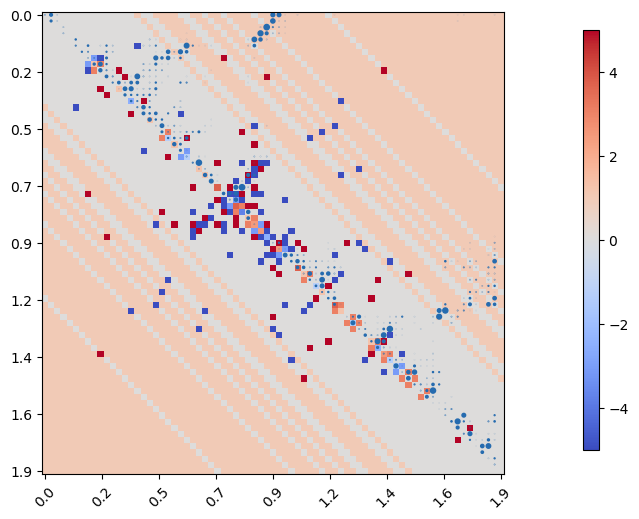

In [9]:
data_pairs = ["/ChIP_seq_2/StemCells/RNAInteraction20250327/output/chimeric/inner/mouse_transcript/SRR13628276/SRR13628276.dedup.pairs.gz", 
              "/ChIP_seq_2/StemCells/RNAInteraction20250327/output/chimeric/inner/mouse_transcript/SRR13628279/SRR13628279.dedup.pairs.gz"]
plot_diffmap(data_pairs, p_chrom1="ENSMUST00000052248.8", p_resolution=25, p_max=5, p_figsize=(6, 6),
             p_structure=True, p_genome="GRCm39T", p_display="upper", p_balance=False,
             p_dot_size=1.0, p_diff="norm_diff", p_verbose=True)